In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from autograd.scalar import Number, Layer, Network
from autograd.scalar.activations import ReLU
from autograd.scalar.losses import HingeLoss
from autograd.scalar.optimizers import Optimizer

In [2]:
np.random.seed(1337)
random.seed(1337)

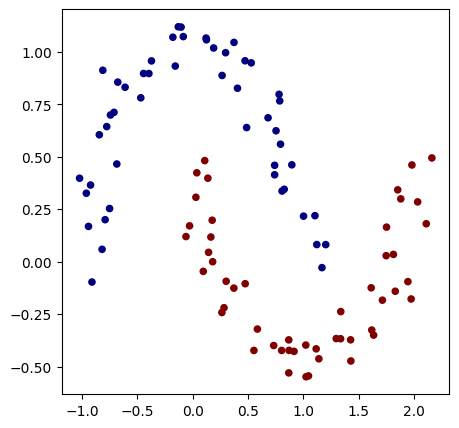

In [3]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(n_samples=100, noise=0.1)

y = y * 2 - 1  # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [9]:
model = Network([
    Layer(2, 16, ReLU),
    Layer(16, 16, ReLU),
    Layer(16, 1)
]) 
model

 Multi Layered Perceptron:
	Layer(2, 16, ReLU)
	Layer(16, 16, ReLU)
	Layer(16, 1, Linear)
 number of parameters = 337

In [10]:
o = Optimizer(model, HingeLoss)
o

Stochastic Gradient Descent on 

  Multi Layered Perceptron:
	Layer(2, 16, ReLU)
	Layer(16, 16, ReLU)
	Layer(16, 1, Linear)
 number of parameters = 337 

 loss = Hinge Loss

In [23]:
o.train(X, y, None, 100)

epoch 0 loss 0.013886868428057867, accuracy 100.0%
epoch 10 loss 0.013833667676103887, accuracy 100.0%
epoch 20 loss 0.013785633579267252, accuracy 100.0%
epoch 30 loss 0.013742713571452498, accuracy 100.0%
epoch 40 loss 0.01370486077674282, accuracy 100.0%
epoch 50 loss 0.013672033924059423, accuracy 100.0%
epoch 60 loss 0.013644197272152932, accuracy 100.0%
epoch 70 loss 0.013621320544735964, accuracy 100.0%
epoch 80 loss 0.013603378875591859, accuracy 100.0%
epoch 90 loss 0.013590352763520415, accuracy 100.0%


(-1.548639298268643, 1.951360701731357)

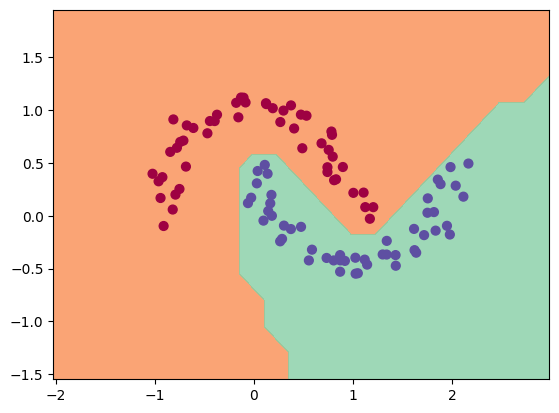

In [22]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Number, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())